# 1. Análisis Exploratorio de Datos (EDA)

**Objetivo:** Entender la estructura, calidad y características principales del conjunto de datos clínicos de Huancayo. Este análisis es el primer paso fundamental del ciclo de vida de un proyecto de Machine Learning y guiará las decisiones de preprocesamiento y modelado.

## 1.1. Configuración Inicial e Importación de Librerías

Importamos las librerías esenciales para el análisis y manipulación de datos, así como para la visualización.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


## 1.2. Carga de Datos

Cargamos el dataset desde el archivo CSV. Es importante especificar la ruta correcta y revisar las primeras filas para asegurar que la carga fue exitosa.

In [2]:
DATA_PATH = "../data/processed/dataset_clinico_huancayo_20k_processed.csv"
try:
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset cargado exitosamente. Dimensiones: {df.shape}")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {DATA_PATH}")

Dataset cargado exitosamente. Dimensiones: (20000, 54)


## 1.3. Vistazo Inicial a la Estructura de los Datos

In [3]:
# Mostramos las primeras 5 filas del dataframe
df.head()

,id,edad,sexo,area,distrito,ocupacion,imc,pas,pad,fc,...,sintoma_debilidad,sintoma_palpitaciones,sintoma_vomitos,sintoma_malestar_general,sintoma_mareo,sintoma_dolor_garganta,sintoma_epistaxis,sintoma_congestion_nasal,sintoma_fatiga,sintoma_dolor_pecho
0,1,12,0,1,2,8,23.8,127,75,94,...,0,0,0,1,0,0,0,0,0,1
1,2,19,0,1,7,4,30.5,110,73,98,...,0,0,0,0,0,0,0,0,0,0
2,3,51,0,1,3,5,27.9,126,76,84,...,0,0,0,0,0,0,0,0,0,0
3,4,44,0,1,4,7,34.9,157,110,92,...,0,0,0,0,0,0,1,0,1,0
4,5,14,0,1,9,8,22.2,119,81,103,...,0,0,0,1,0,1,0,1,0,1


## 1.4. Información General del DataFrame

Utilizamos `info()` para obtener un resumen conciso del DataFrame, incluyendo el tipo de dato de cada columna y la cantidad de valores no nulos. Esto es clave para una primera detección de datos faltantes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               20000 non-null  int64  
 1   edad                             20000 non-null  int64  
 2   sexo                             20000 non-null  int64  
 3   area                             20000 non-null  int64  
 4   distrito                         20000 non-null  int64  
 5   ocupacion                        20000 non-null  int64  
 6   imc                              20000 non-null  float64
 7   pas                              20000 non-null  int64  
 8   pad                              20000 non-null  int64  
 9   fc                               20000 non-null  int64  
 10  fr                               20000 non-null  int64  
 11  temp                             20000 non-null  float64
 12  spo2              

## 1.5. Estadísticas Descriptivas

Con `describe()`, obtenemos estadísticas fundamentales (media, desviación estándar, percentiles, etc.) para todas las variables numéricas. Esto nos da una idea de la escala y distribución de cada variable.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20000.0,10000.500000,5773.647028,1.0,5000.75,10000.50,15000.25,20000.0
edad,20000.0,45.814800,22.772785,1.0,31.00,49.00,64.00,87.0
sexo,20000.0,0.487550,0.499857,0.0,0.00,0.00,1.00,1.0
area,20000.0,0.848450,0.358593,0.0,1.00,1.00,1.00,1.0
distrito,20000.0,4.495100,2.876889,0.0,2.00,5.00,7.00,9.0
ocupacion,20000.0,7.863600,3.526616,0.0,6.00,8.00,10.00,14.0
imc,20000.0,27.393150,4.191339,18.5,24.80,27.70,30.30,35.0
pas,20000.0,132.944200,20.658965,83.0,117.00,128.00,147.00,199.0
pad,20000.0,84.700850,11.635610,65.0,76.00,82.00,93.00,110.0
fc,20000.0,89.095950,9.998762,70.0,82.00,89.00,95.00,110.0


## 1.6. Análisis de la Variable Objetivo: `diagnostico`

Es crucial analizar la distribución de la variable objetivo para entender el balance o desbalance de las clases. Un desbalance significativo requerirá técnicas especiales durante el modelado.

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\2436215401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='diagnostico_str', data=df, order=df['diagnostico_str'].value_counts().index, palette='viridis')


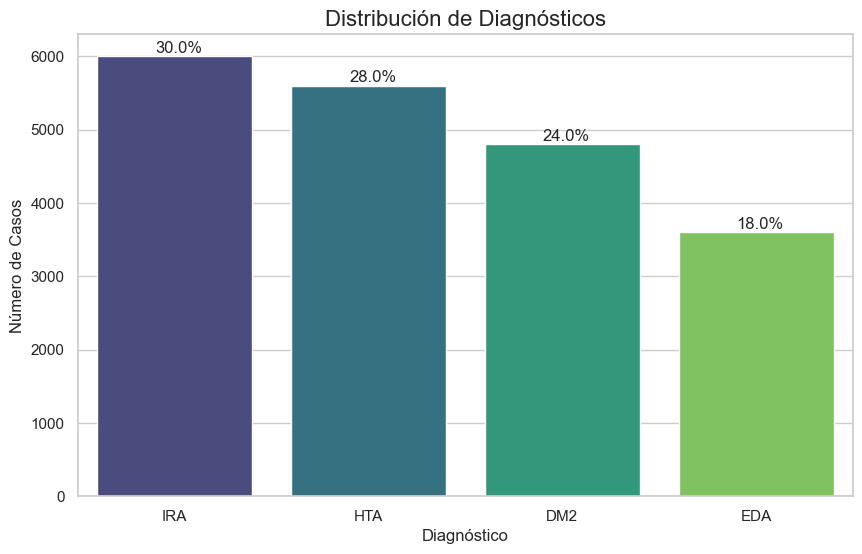

Distribución de clases:
diagnostico_str
IRA    30.0
HTA    28.0
DM2    24.0
EDA    18.0
Name: proportion, dtype: float64


In [6]:
# Mapeo de la variable 'diagnostico' a etiquetas legibles
diagnostico_map = {0: 'DM2', 1: 'EDA', 2: 'HTA', 3: 'IRA'}
df['diagnostico_str'] = df['diagnostico'].map(diagnostico_map)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='diagnostico_str', data=df, order=df['diagnostico_str'].value_counts().index, palette='viridis')
ax.set_title('Distribución de Diagnósticos', fontsize=16)
ax.set_xlabel('Diagnóstico', fontsize=12)
ax.set_ylabel('Número de Casos', fontsize=12)

# Añadir porcentajes en las barras
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), fontsize=12)
    
plt.show()

print("Distribución de clases:")
print(df['diagnostico_str'].value_counts(normalize=True) * 100)

## 1.7. Análisis de Variables Categóricas y Demográficas

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\3198345023.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=axes[i], palette='pastel', order=df[var].value_counts().index)
C:\Users\marks\AppData\Local\Temp\ipykernel_27076\3198345023.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=axes[i], palette='pastel', order=df[var].value_counts().index)
C:\Users\marks\AppData\Local\Temp\ipykernel_27076\3198345023.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=axes[i], palette

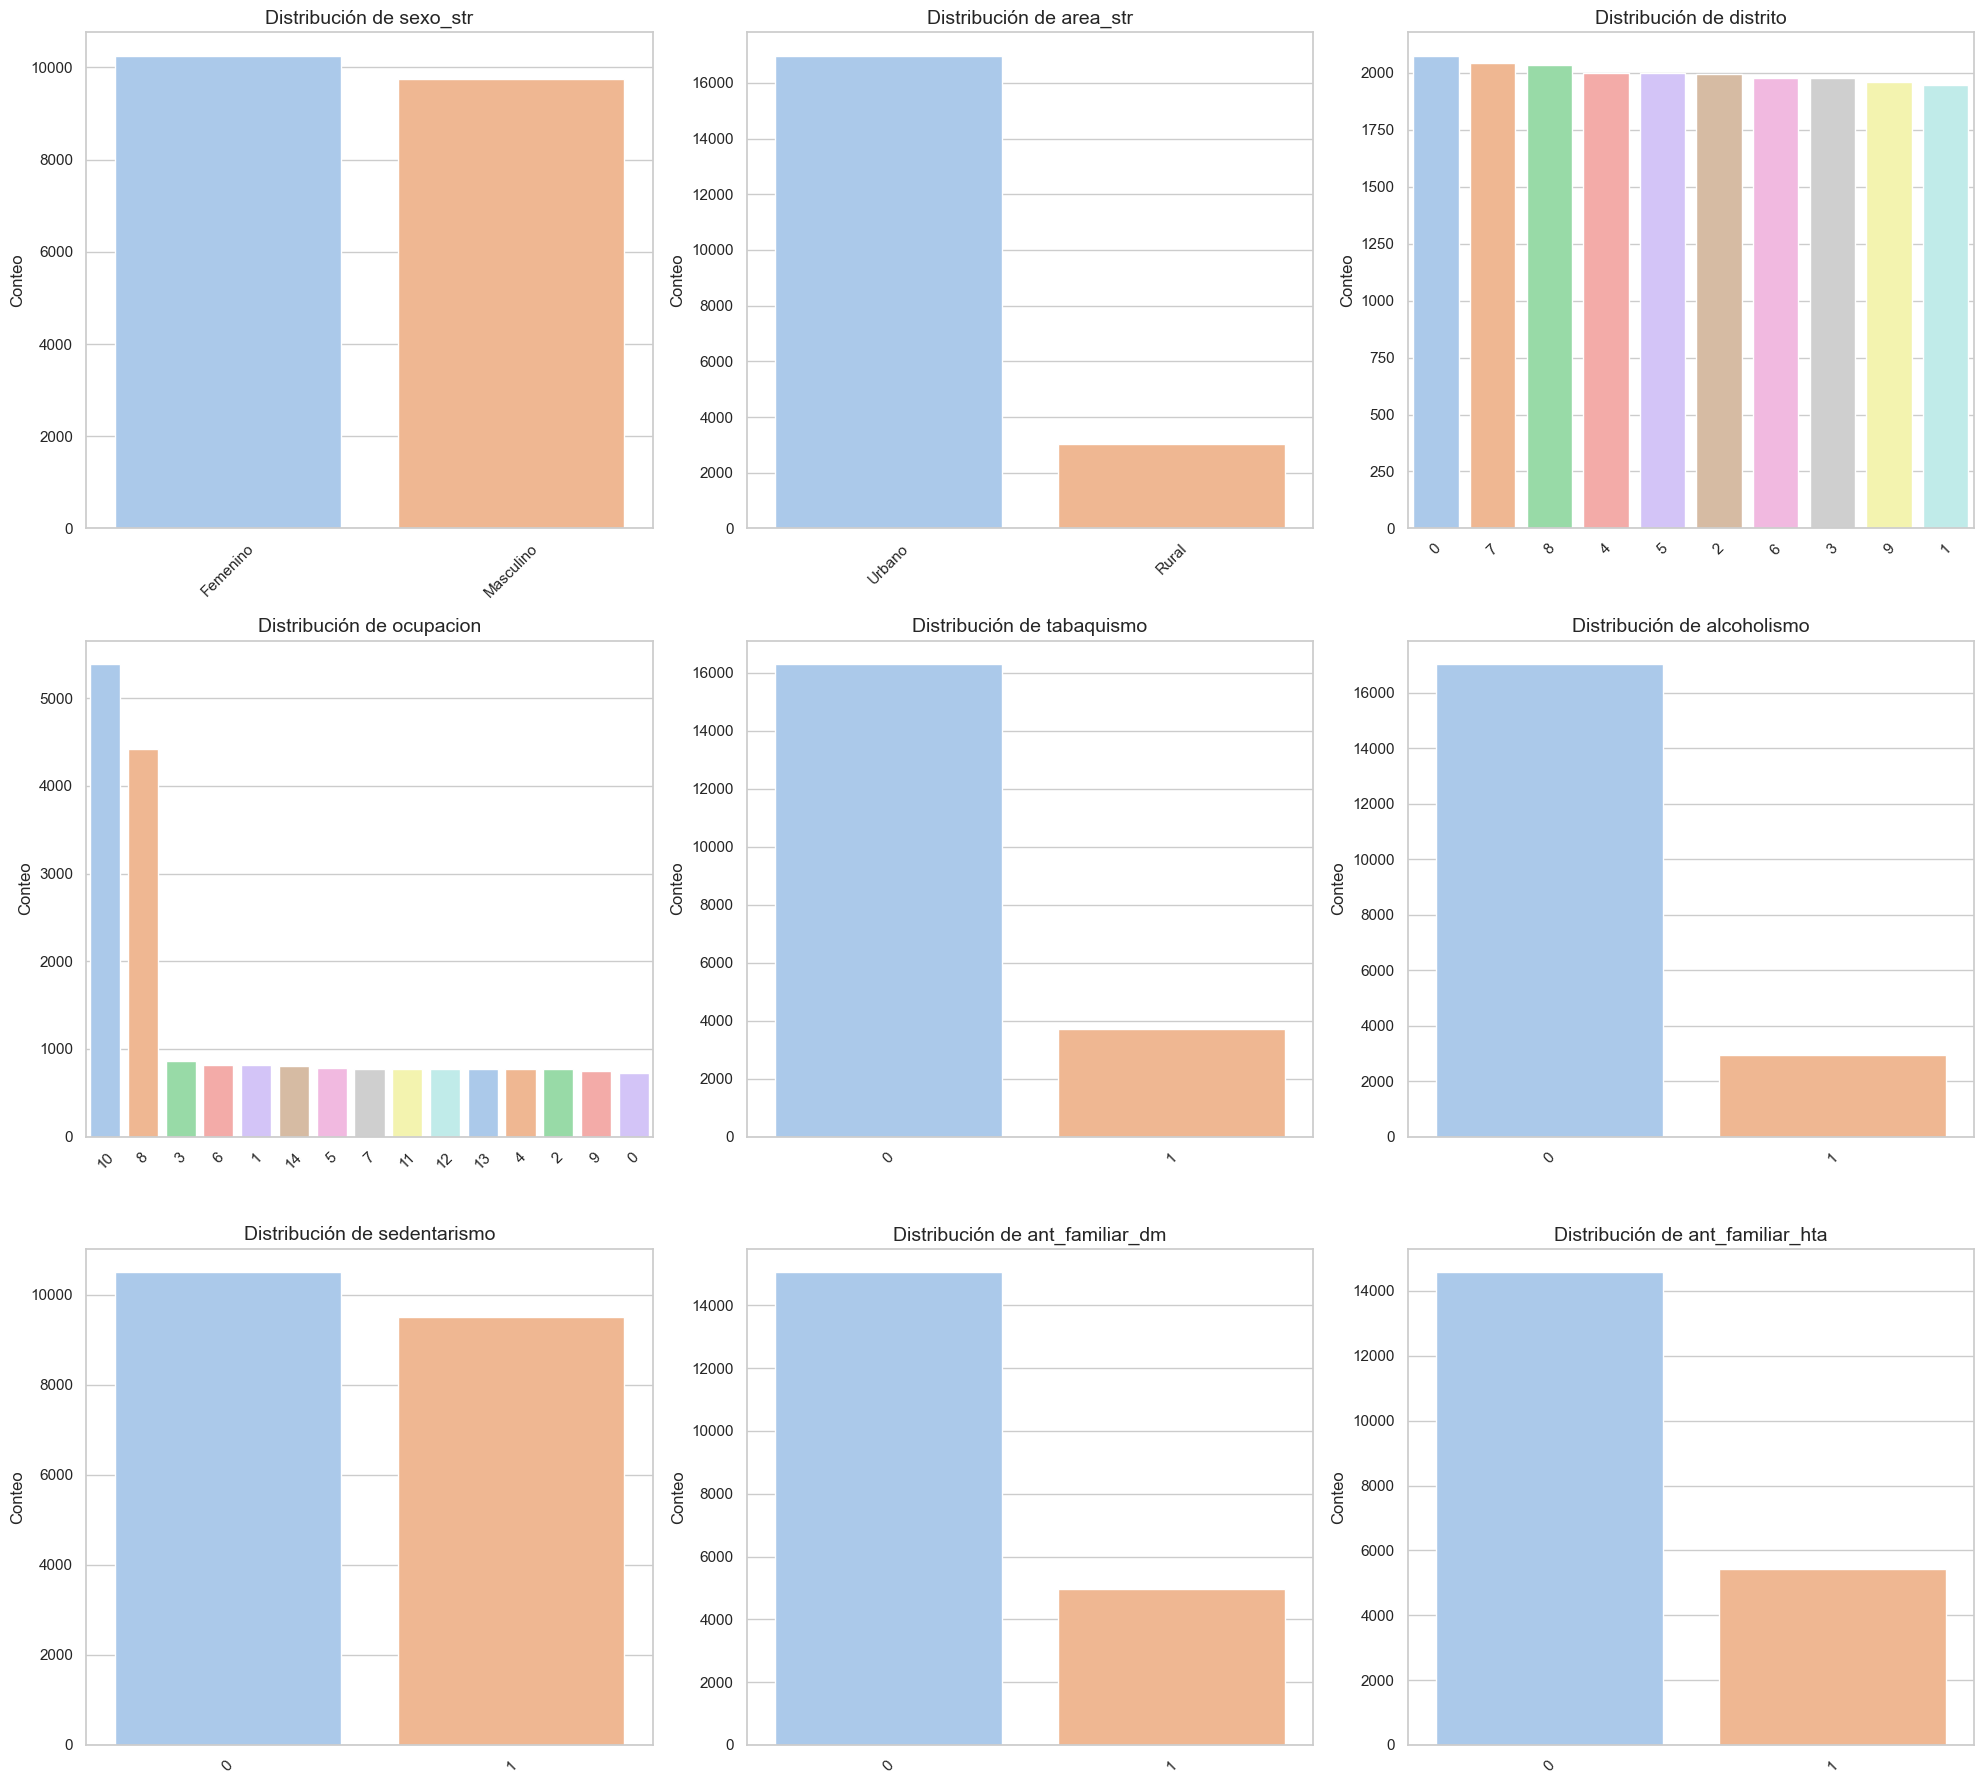

In [7]:
# Mapeo de variables para mejor legibilidad en gráficos
df['sexo_str'] = df['sexo'].map({0: 'Femenino', 1: 'Masculino'})
df['area_str'] = df['area'].map({0: 'Rural', 1: 'Urbano'})

categorical_vars = ['sexo_str', 'area_str', 'distrito', 'ocupacion', 'tabaquismo', 'alcoholismo', 'sedentarismo', 'ant_familiar_dm', 'ant_familiar_hta']

fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes[i], palette='pastel', order=df[var].value_counts().index)
    axes[i].set_title(f'Distribución de {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Conteo')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 1.8. Análisis de Variables Numéricas Clave

Visualizamos la distribución de las variables numéricas más importantes mediante histogramas y box plots. Los box plots son especialmente útiles para comparar las distribuciones entre los diferentes diagnósticos.

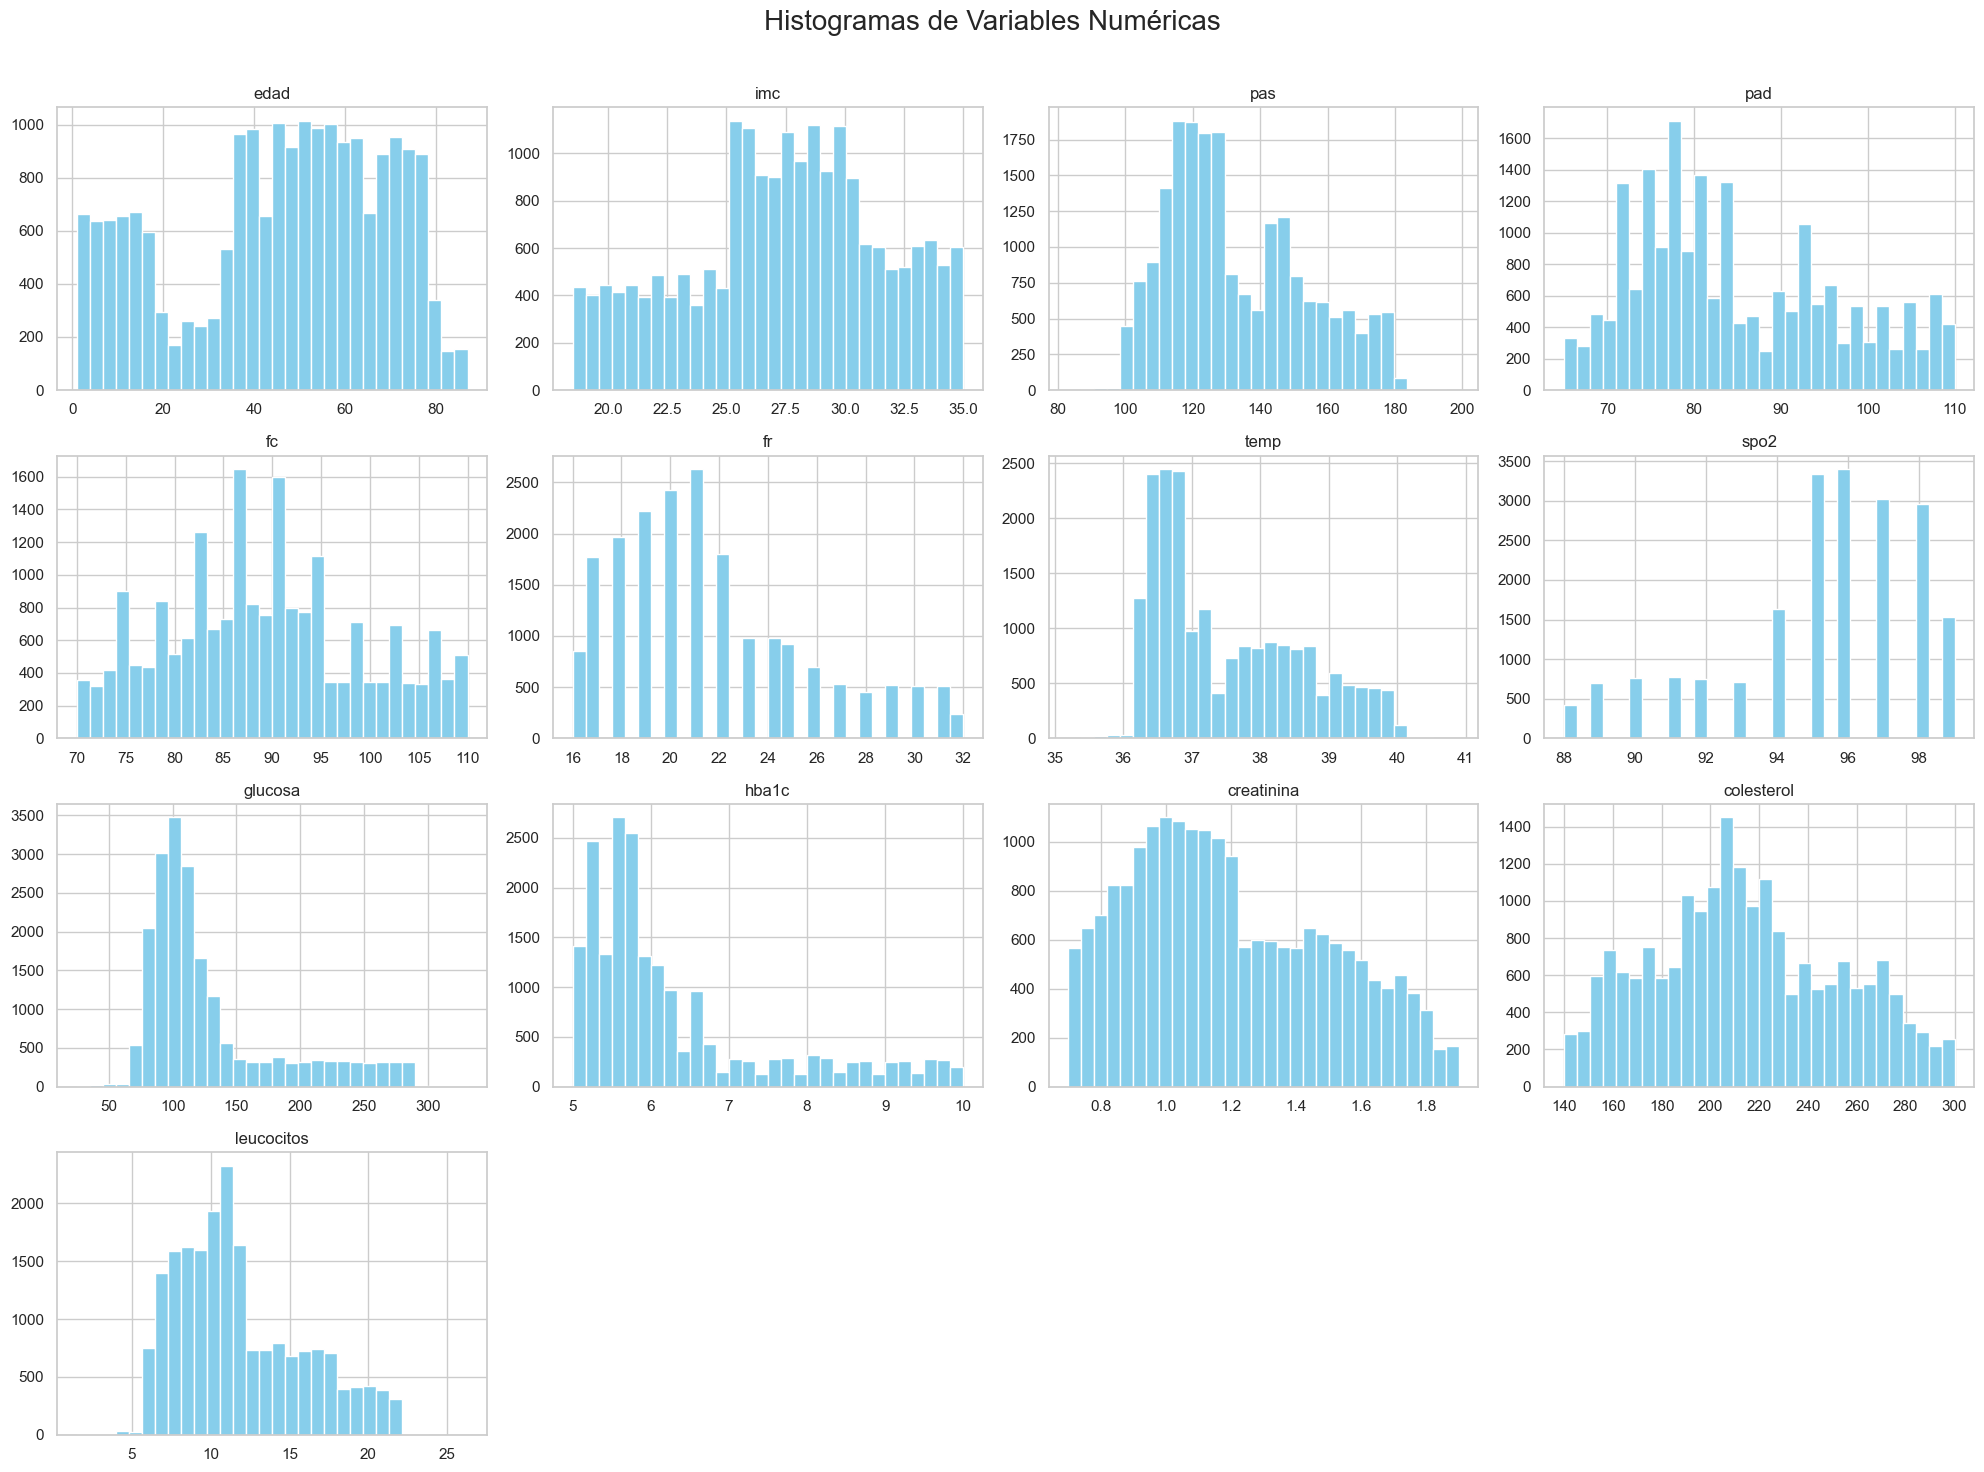

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


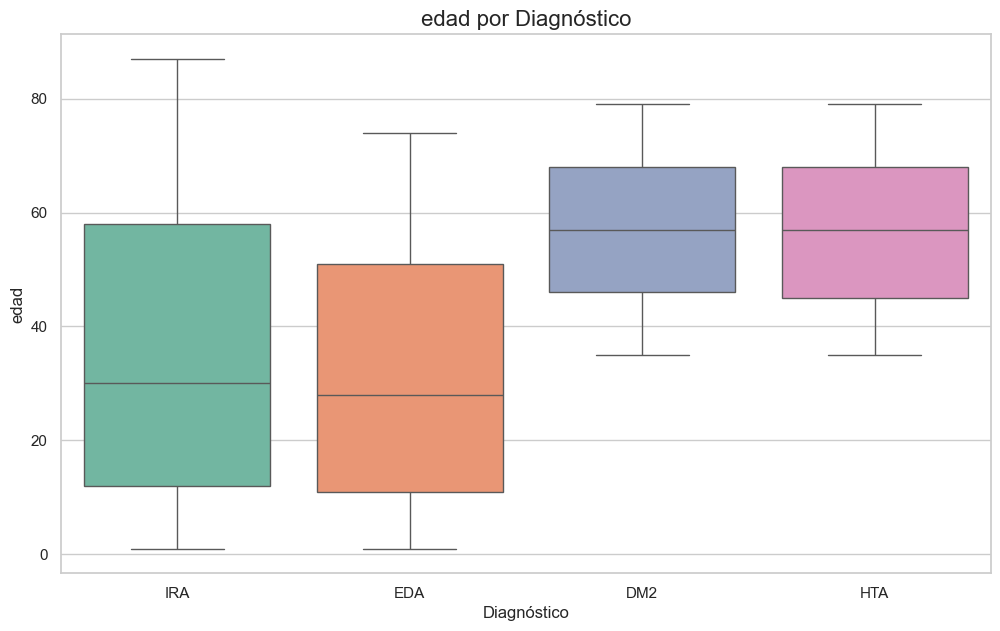

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


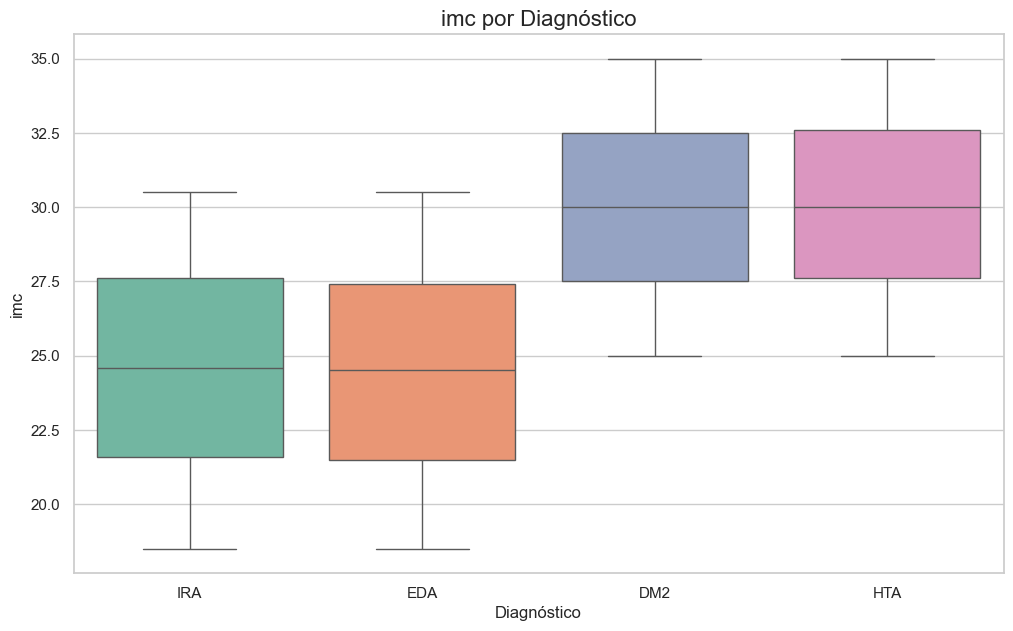

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


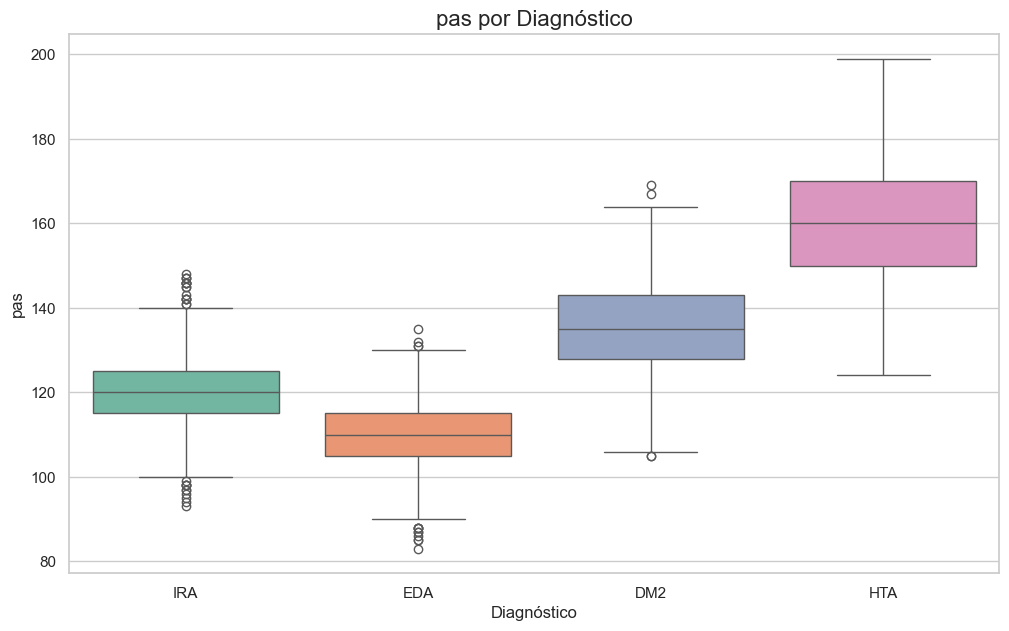

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


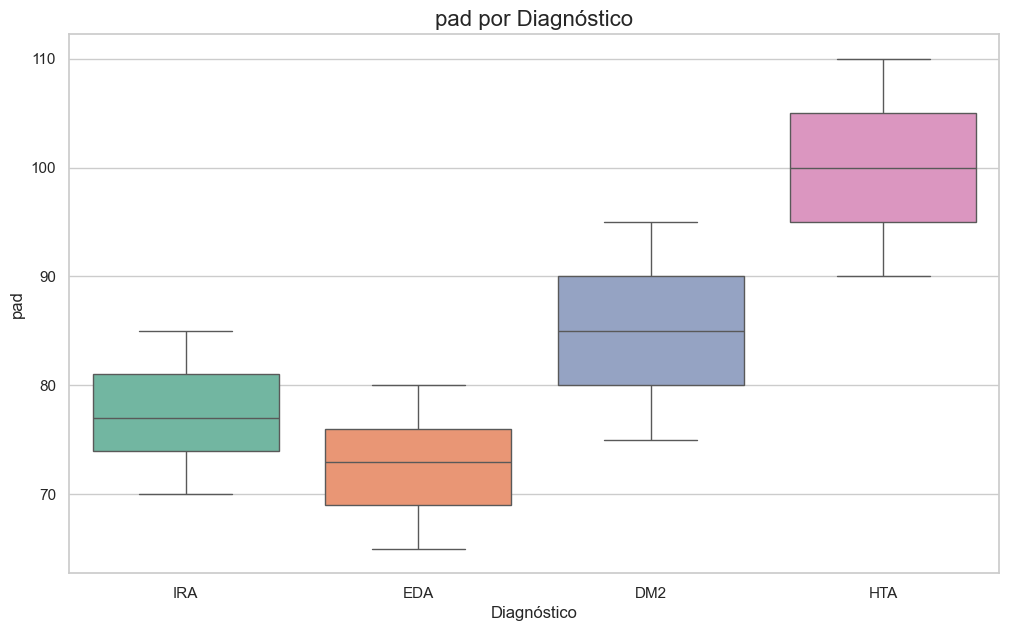

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


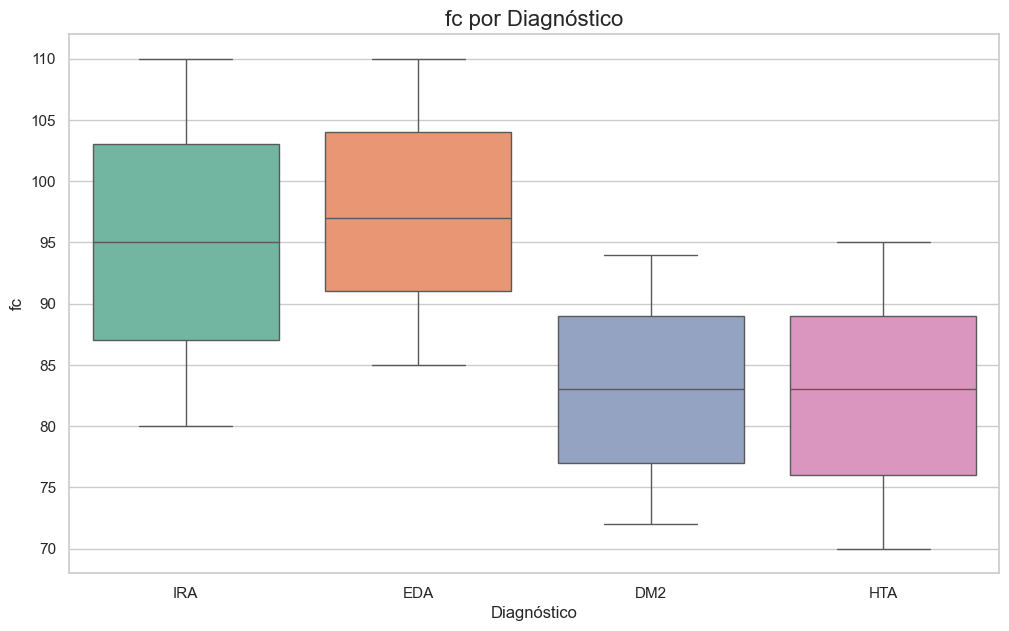

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


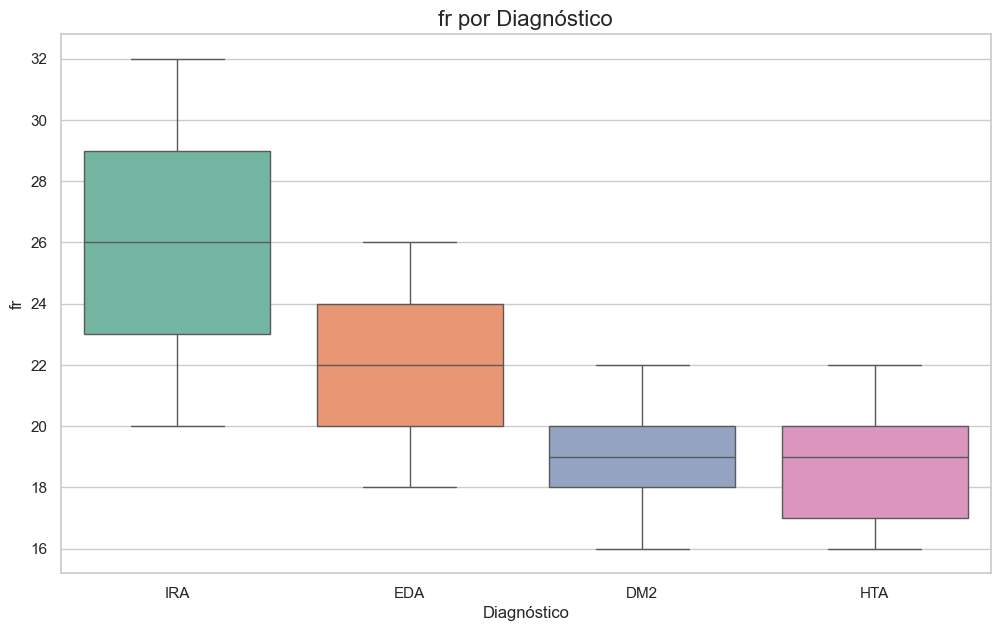

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


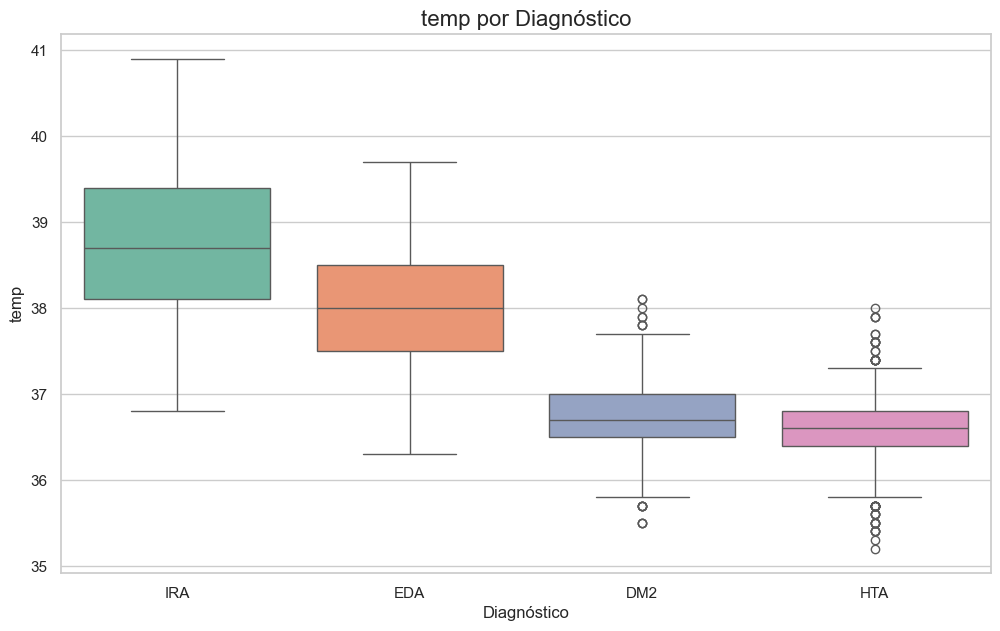

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


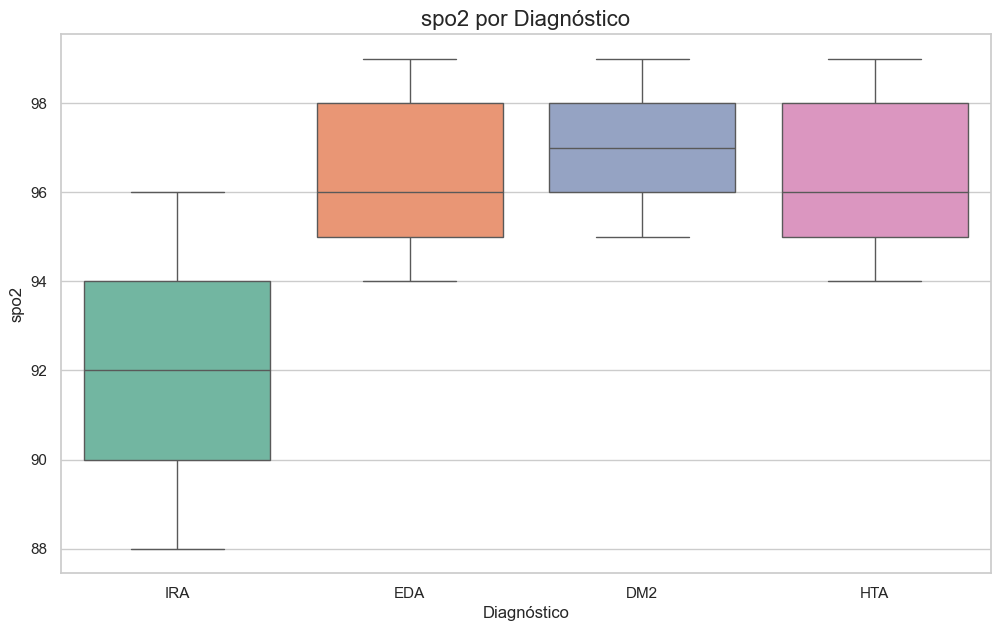

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


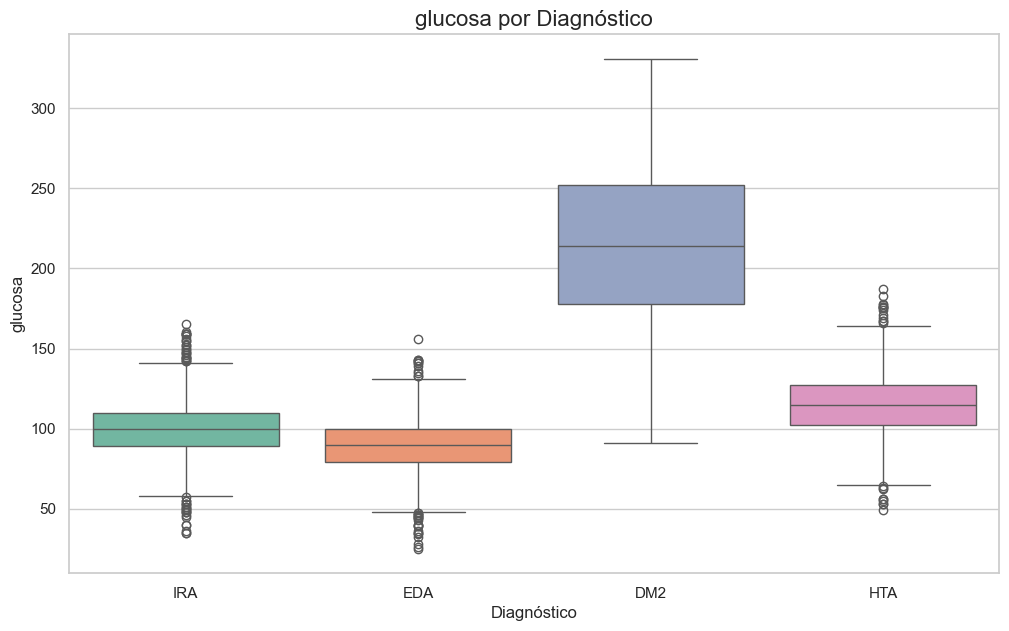

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


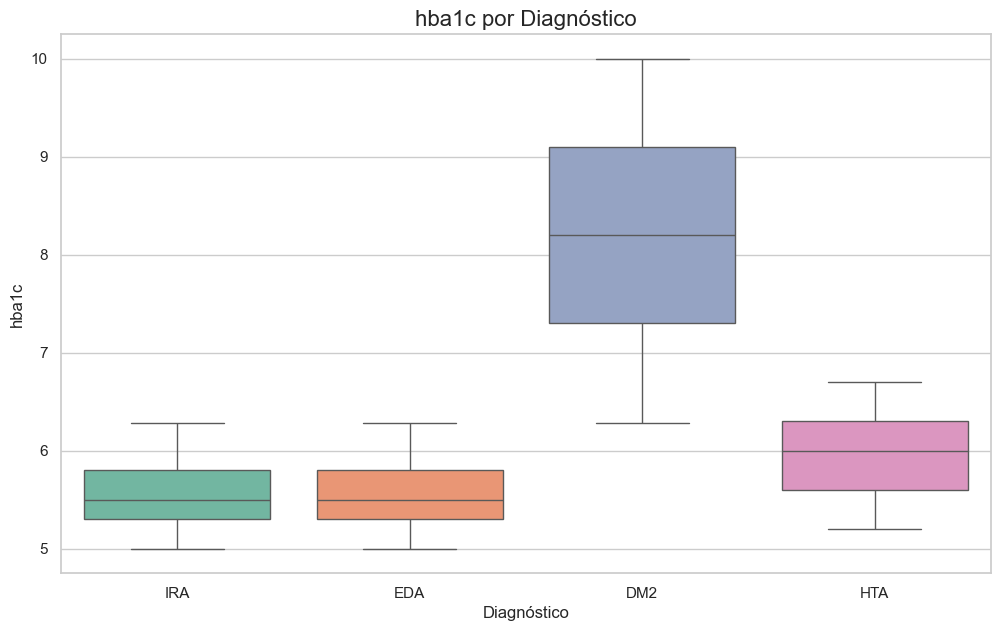

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


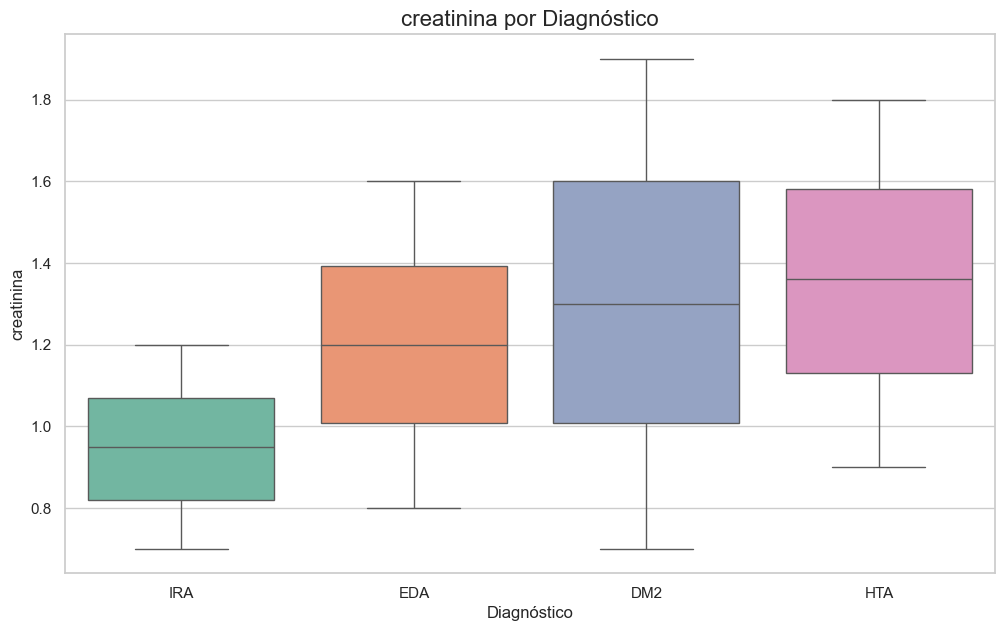

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


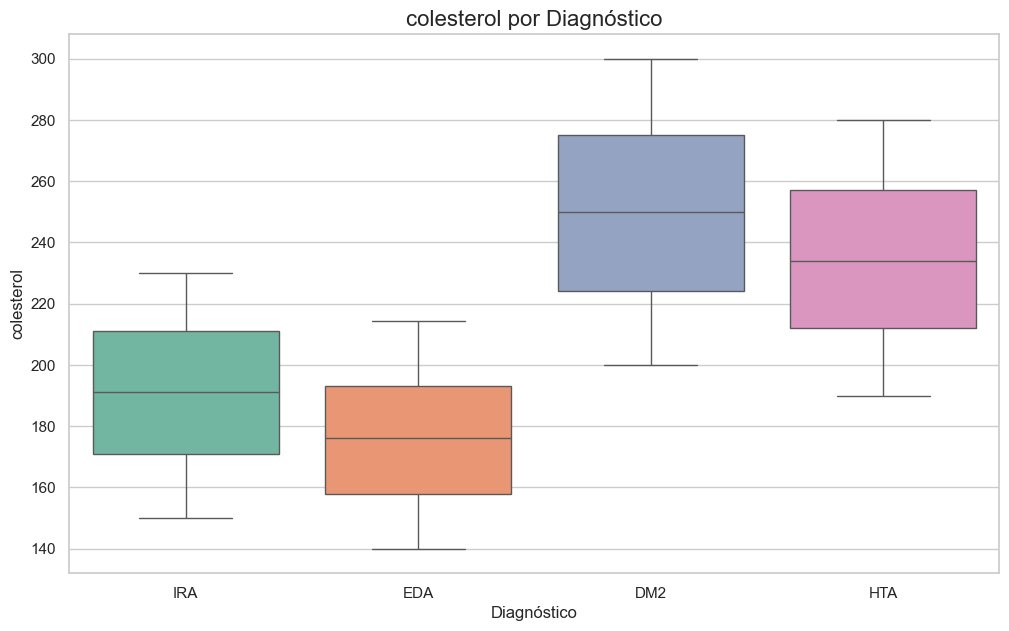

C:\Users\marks\AppData\Local\Temp\ipykernel_27076\1174111008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')


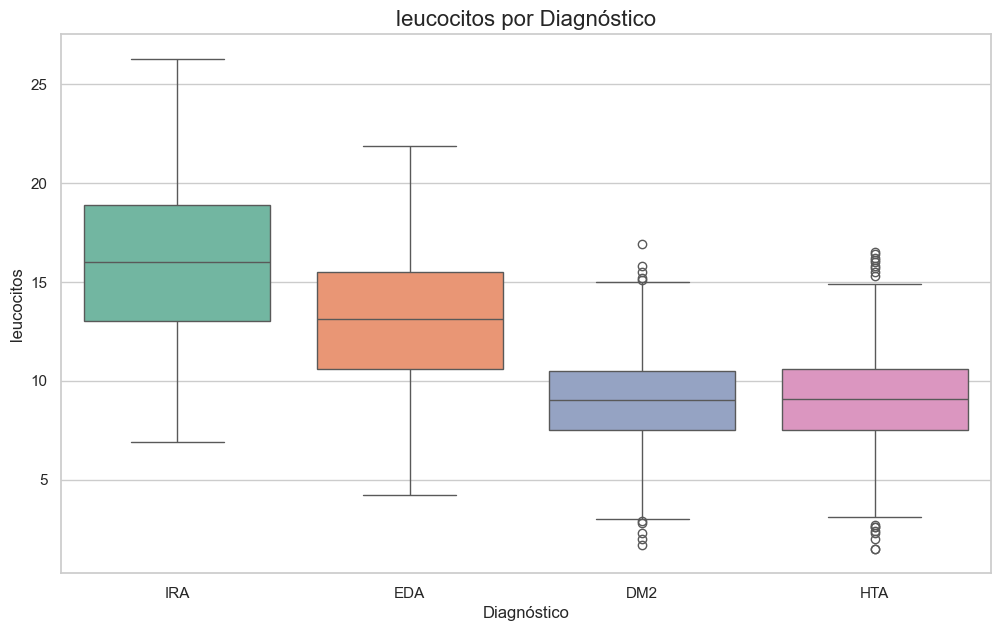

In [8]:
numerical_vars = ['edad', 'imc', 'pas', 'pad', 'fc', 'fr', 'temp', 'spo2', 'glucosa', 'hba1c', 'creatinina', 'colesterol', 'leucocitos']

# Histogramas
df[numerical_vars].hist(bins=30, figsize=(20, 15), layout=(4, 4), color='skyblue')
plt.suptitle('Histogramas de Variables Numéricas', size=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Box plots por diagnóstico
for var in numerical_vars:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='diagnostico_str', y=var, data=df, palette='Set2')
    plt.title(f'{var} por Diagnóstico', fontsize=16)
    plt.xlabel('Diagnóstico', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.show()

## 1.9. Matriz de Correlación

Una matriz de correlación nos ayuda a entender las relaciones lineales entre las variables numéricas. Valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente. Esto es útil para la selección de características y para detectar multicolinealidad.

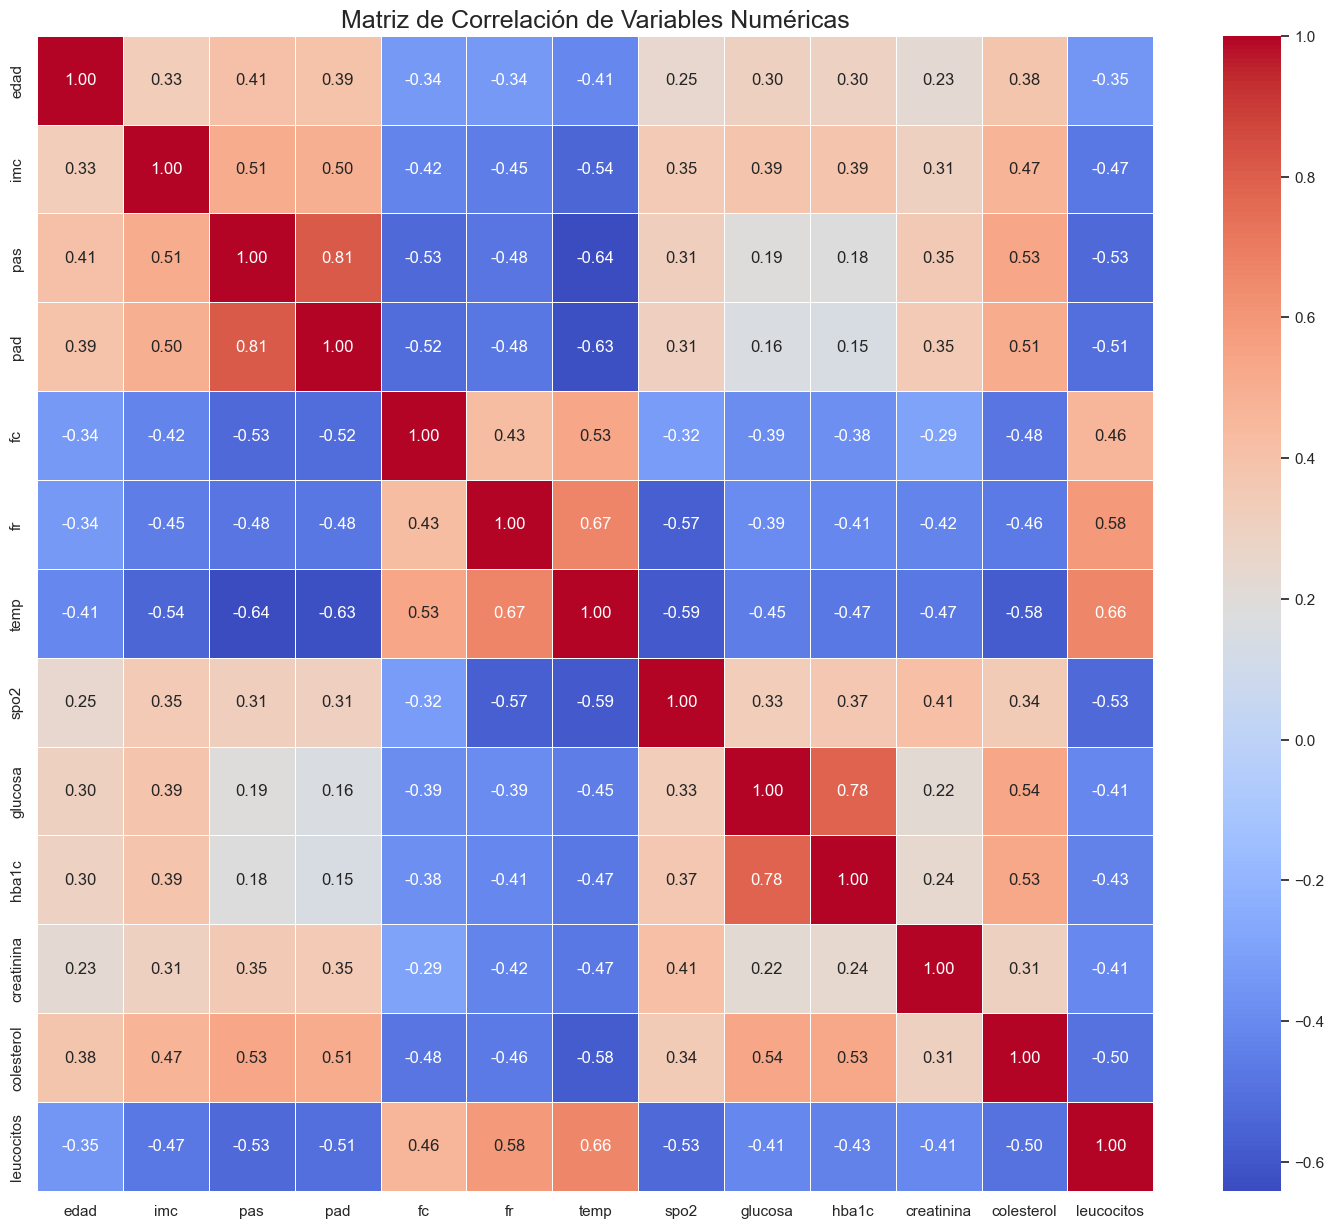

In [9]:
plt.figure(figsize=(18, 15))
correlation_matrix = df[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=18)
plt.show()

## 1.10. Análisis de Síntomas por Diagnóstico

Este es uno de los análisis más importantes. Queremos ver qué síntomas son más característicos de cada enfermedad. Un heatmap es ideal para visualizar la prevalencia (en porcentaje) de cada síntoma para cada uno de los cuatro diagnósticos.

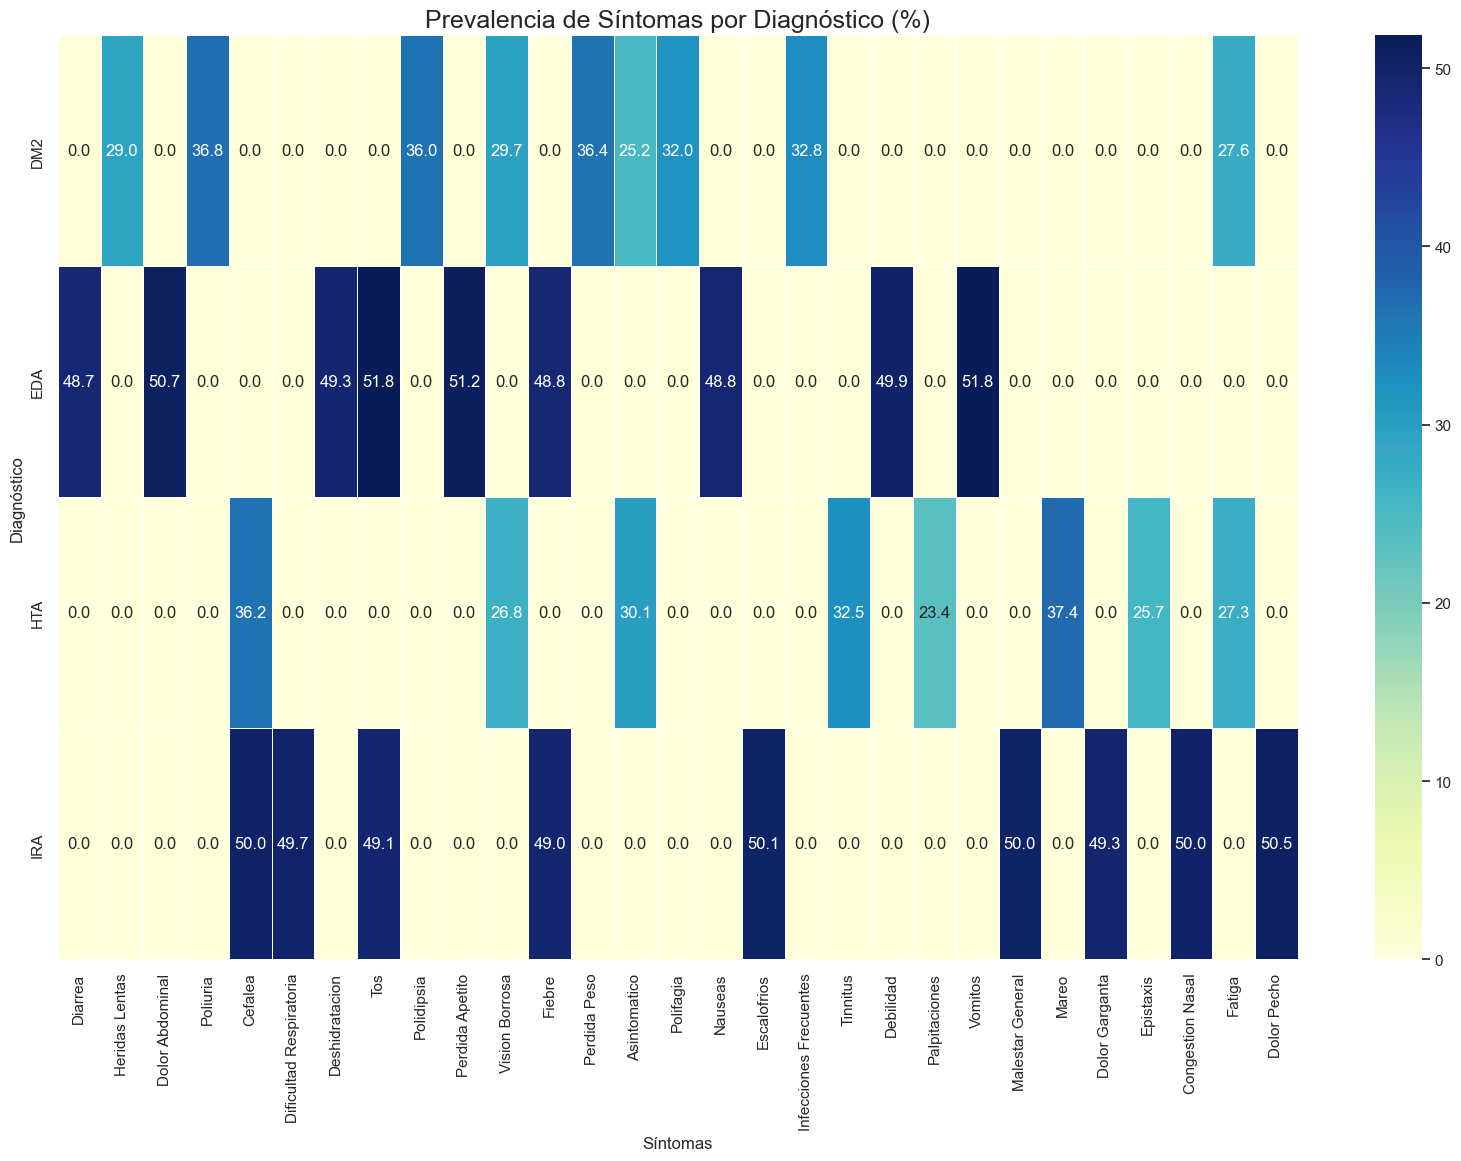

In [10]:
symptom_cols = [col for col in df.columns if col.startswith('sintoma_')]
symptom_analysis = df.groupby('diagnostico_str')[symptom_cols].mean() * 100

# Limpiar nombres de síntomas para el gráfico
symptom_analysis.columns = [col.replace('sintoma_', '').replace('_', ' ').title() for col in symptom_analysis.columns]

plt.figure(figsize=(20, 12))
sns.heatmap(symptom_analysis, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Prevalencia de Síntomas por Diagnóstico (%)', fontsize=18)
plt.xlabel('Síntomas', fontsize=12)
plt.ylabel('Diagnóstico', fontsize=12)
plt.show()